## Import Library yg dibutuhkan

In [231]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import imblearn as imb
from collections import Counter
from numpy import where
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
#tambahkan library sesuai kebutuhan

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [233]:
data = pd.read_csv(r'/content/gdrive/Shareddrives/Dataset/activity_km_07_01.csv')

In [234]:
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 1. Mengganti nama kolom yang menggunakan spasi

In [235]:
#isi code
df = pd.DataFrame(data)
print("Dataframe columns : ", df.columns)


Dataframe columns :  Index(['PH', 'cahaya', 'intensitas air', 'suhu', 'PPM', 'tinggi air', 'aksi'], dtype='object')


In [236]:
#Mengubah nama
old_names = ['PH', 'cahaya', 'intensitas air', 'suhu', 'PPM', 'tinggi air', 'aksi'] 
new_names = ['PH', 'Cahaya', 'Intensitas_Air', 'Suhu', 'PPM', 'Tinggi_Air', 'Aksi']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [237]:
#Isi Code

pd.DataFrame(df.groupby(['Intensitas_Air','Tinggi_Air','PH']))
df.reset_index()

,index,PH,Cahaya,Intensitas_Air,Suhu,PPM,Tinggi_Air,Aksi
0,0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...,...
611,611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


In [238]:
def getNumberIA(str):
    if str=="Tinggi":
        return 1.0
    elif str=="Cukup":
        return 2.0
    elif str=="Rendah":
        return 3.0
    else:
        return 4.0
data["Intensitas_Air"]=data["Intensitas_Air"].apply(getNumberIA)

data.head()

,PH,Cahaya,Intensitas_Air,Suhu,PPM,Tinggi_Air,Aksi
0,6.5,Ada,1.0,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,1.0,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,1.0,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,1.0,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,1.0,27.1,602.0,444,Tidak melakukan apa-apa


In [239]:
def getNumber(str):
    if str=="Ada":
        return 1.0
    else:
        return 2.0
data["Cahaya"]=data["Cahaya"].apply(getNumber)

data.head()

,PH,Cahaya,Intensitas_Air,Suhu,PPM,Tinggi_Air,Aksi
0,6.5,1.0,1.0,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,1.0,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,1.0,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,1.0,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,2.0,1.0,27.1,602.0,444,Tidak melakukan apa-apa


In [240]:
def getNumberAksi(str):
    if str=="Hidupkan Lampu dan Pompa nutrisi TDS":
        return 1.0
    elif str=="Hidupkan Lampu":
        return 2.0
    else:
        return 3.0
data["Aksi"]=data["Aksi"].apply(getNumberAksi)

data.head()

,PH,Cahaya,Intensitas_Air,Suhu,PPM,Tinggi_Air,Aksi
0,6.5,1.0,1.0,27.0,188.0,622,1.0
1,5.7,1.0,1.0,26.9,79.0,557,1.0
2,6.0,1.0,1.0,27.0,11.0,491,1.0
3,6.5,1.0,1.0,27.1,345.0,12000,3.0
4,6.2,2.0,1.0,27.1,602.0,444,3.0


## 3. Handle Missing Value

In [241]:
#Isi Code
data.isna().sum()

PH                16
Cahaya             0
Intensitas_Air     0
Suhu              27
PPM                5
Tinggi_Air         0
Aksi               0
dtype: int64

In [242]:
data["Suhu"]=data["Suhu"].fillna(data["Suhu"].median())
data["Cahaya"]=data["Cahaya"].fillna(data["Cahaya"].mode()[0])
data["PH"]=data["PH"].fillna(data["PH"].median())
data["PPM"]=data["PPM"].fillna(data["PPM"].median())

In [243]:
data.isna().sum()

PH                0
Cahaya            0
Intensitas_Air    0
Suhu              0
PPM               0
Tinggi_Air        0
Aksi              0
dtype: int64

## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

In [244]:
#Isi Code
data.columns

Index(['PH', 'Cahaya', 'Intensitas_Air', 'Suhu', 'PPM', 'Tinggi_Air', 'Aksi'], dtype='object')

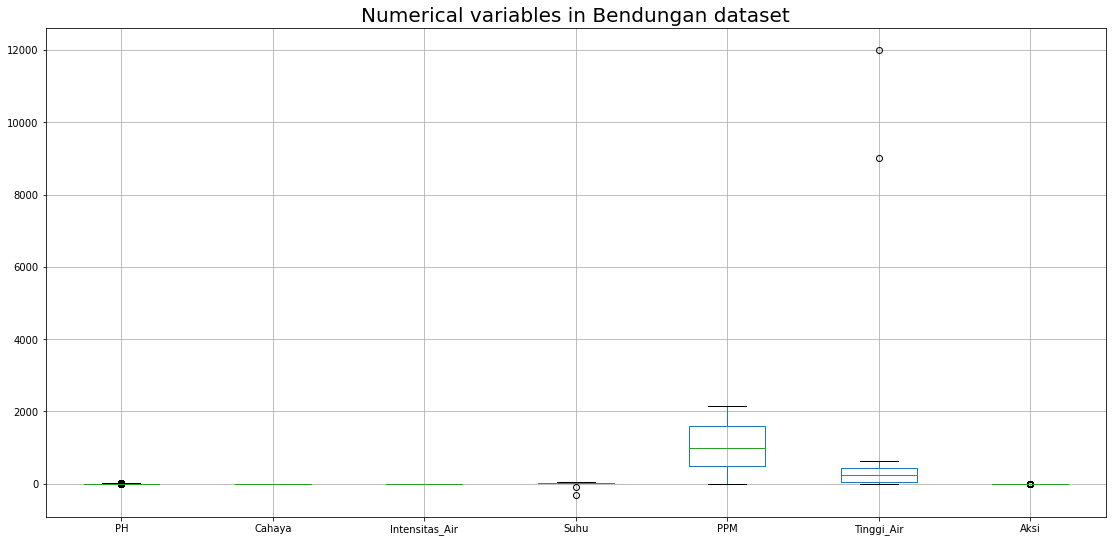

In [312]:
#Outliers
num_cols = ['PH', 'Cahaya', 'Intensitas_Air', 'Suhu', 'PPM', 'Tinggi_Air', 'Aksi']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Numerical variables in Bendungan dataset", fontsize=20)
plt.show()

In [313]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

columns_outlier = ['Tinggi_Air', 'Suhu']
for col in columns_outlier:
    outliers=[]
    outlier_datapoints = detect_outlier(data[col])
    print(col, outlier_datapoints)

Tinggi_Air [12000, 9000]
Suhu [-300.0, -100.0]


## 5. Pisahkan data feature dengan label

In [246]:
#Isi Code
X = data.iloc[:,:7].values

In [247]:
Y = data.iloc[:, 6].values

In [248]:
X

array([[6.500e+00, 1.000e+00, 1.000e+00, ..., 1.880e+02, 6.220e+02,
        1.000e+00],
       [5.700e+00, 1.000e+00, 1.000e+00, ..., 7.900e+01, 5.570e+02,
        1.000e+00],
       [6.000e+00, 1.000e+00, 1.000e+00, ..., 1.100e+01, 4.910e+02,
        1.000e+00],
       ...,
       [3.200e+00, 1.000e+00, 4.000e+00, ..., 7.930e+02, 1.900e+01,
        2.000e+00],
       [1.400e+00, 1.000e+00, 4.000e+00, ..., 1.052e+03, 3.000e+00,
        2.000e+00],
       [5.000e+00, 1.000e+00, 4.000e+00, ..., 9.770e+02, 1.900e+01,
        2.000e+00]])

In [249]:
Y

array([1., 1., 1., 3., 3., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
       1., 1., 1., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [310]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [250]:
#pip install imbalanced-learn
!pip install imbalanced-learn

In [251]:
#Isi Code
data.count()

PH                616
Cahaya            616
Intensitas_Air    616
Suhu              616
PPM               616
Tinggi_Air        616
Aksi              616
dtype: int64

## 7. Visualisasikan Tiap feature dengan label

In [ ]:
#Isi Code


## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

In [252]:
#Isi Kode
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()
# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[4.64285714e-01 0.00000000e+00 0.00000000e+00 ... 8.70577281e-02
  5.18333333e-02 0.00000000e+00]
 [4.07142857e-01 0.00000000e+00 0.00000000e+00 ... 3.63128492e-02
  4.64166667e-02 0.00000000e+00]
 [4.28571429e-01 0.00000000e+00 0.00000000e+00 ... 4.65549348e-03
  4.09166667e-02 0.00000000e+00]
 ...
 [2.28571429e-01 0.00000000e+00 1.00000000e+00 ... 3.68715084e-01
  1.58333333e-03 5.00000000e-01]
 [1.00000000e-01 0.00000000e+00 1.00000000e+00 ... 4.89292365e-01
  2.50000000e-04 5.00000000e-01]
 [3.57142857e-01 0.00000000e+00 1.00000000e+00 ... 4.54376164e-01
  1.58333333e-03 5.00000000e-01]]


## 9. Buat model KNN

In [270]:
#Isi Code
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, Y, test_size = 0.5, random_state = 42)

In [271]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [272]:
from sklearn import metrics

y_predict = knn.predict(X_test)
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y_predict))

Test set Accuracy:  0.987012987012987


In [273]:
import numpy as np
Ks = 10
mean_acc = np.zeros((Ks))


for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    y_predict=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, y_predict)

mean_acc

array([0.98701299, 0.98701299, 0.98701299, 0.98701299, 0.98701299,
       0.98701299, 0.98701299, 0.98701299, 0.98701299, 0.98701299])

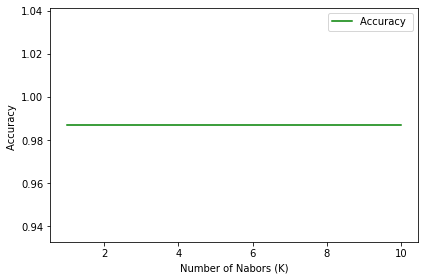

In [274]:
plt.plot(range(1,Ks+1),mean_acc,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [275]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.987012987012987 with k= 1


## 10. Build Model ANN

In [347]:
model = Sequential()
model.add(Dense(16, input_shape=(7,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

In [348]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [349]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y, test_size = 0.6, random_state = 42)

In [350]:
hasil = model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_split=0.3)

Epoch 1/100
6/6 [==============================] - 0s 27ms/step - loss: 1.3739 - accuracy: 0.0233 - val_loss: 1.2875 - val_accuracy: 0.3649
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 1.2292 - accuracy: 0.7267 - val_loss: 1.1591 - val_accuracy: 0.8378
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1006 - accuracy: 0.8547 - val_loss: 1.0445 - val_accuracy: 0.8243
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.9798 - accuracy: 0.8488 - val_loss: 0.9415 - val_accuracy: 0.7703
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.8749 - accuracy: 0.8314 - val_loss: 0.8513 - val_accuracy: 0.7703
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7814 - accuracy: 0.8314 - val_loss: 0.7746 - val_accuracy: 0.7703
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7028 - accuracy: 0.8314 - val_loss: 0.7116 - val_accuracy: 0.7703
Epoch 8/100
6/6 [=========

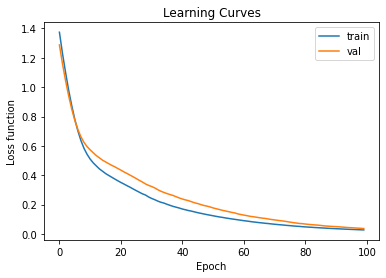

In [351]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.plot(hasil.history['loss'], label='train')
plt.plot(hasil.history['val_loss'], label='val')
plt.legend()
plt.show()

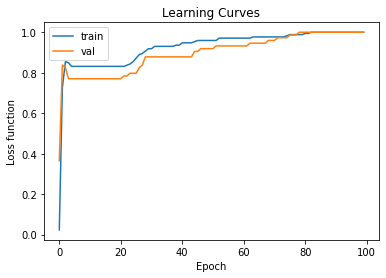

In [353]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.plot(hasil.history['accuracy'], label='train')
plt.plot(hasil.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [354]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy_model: %.3f' % acc)

Test Accuracy_model: 0.989
